<a href="https://colab.research.google.com/github/Jubayer934/Deep-Fake-Detection/blob/main/Hybrid_XcepVit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Connecting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import nbformat


input_path = "/content/drive/MyDrive/ModelTrain/DFD/Colab/Hybrid_XcepVit.ipynb"

with open(input_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

if "widgets" in nb.get("metadata", {}):
    del nb["metadata"]["widgets"]

with open(input_path, "w", encoding="utf-8") as f:
    nbformat.write(nb, f)

print("Cleaned and overwritten:", input_path)

Cleaned and overwritten: /content/drive/MyDrive/ModelTrain/DFD/Colab/Hybrid_XcepVit.ipynb


In [3]:
# import zipfile
# import os

# # Path to the zip file in Drive
# zip_path = "/content/drive/MyDrive/ModelTrain/DFD/Dataset/DFD.zip"

# # Unzip it to /content/
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall("/content/deepfake_dataset")

# # Set dataset path
# dataset_path = "/content/deepfake_dataset"

In [4]:
import zipfile
import os

# Path to the zip file in Drive
zip_path = "/content/drive/MyDrive/ModelTrain/DFD/Dataset/extract_frames.zip"

# Unzip it to /content/
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/deepfake_dataset")

# Set dataset path
dataset_path = "/content/deepfake_dataset"

In [5]:
# import os

# # List top-level files/folders
# print(os.listdir("/content/deepfake_dataset"))

# # If it's nested, explore further:
# for root, dirs, files in os.walk("/content/deepfake_dataset"):
#     print("Root:", root)
#     print("Dirs:", dirs)
#     print("Files:", files[:5])  # just print the first 5 files
#     print("===")

In [6]:
!pip install opencv-python

In [7]:
# import cv2
# import os

# # Function to count readable videos in a directory
# def count_readable_videos(directory):
#     video_files = [f for f in os.listdir(directory) if f.endswith(('.mp4', '.avi', '.mov', '.mkv'))]
#     readable_count = 0
#     for video_file in video_files:
#         video_path = os.path.join(directory, video_file)
#         cap = cv2.VideoCapture(video_path)
#         if cap.isOpened():
#             readable_count += 1
#             cap.release()
#     return readable_count

# # Count readable videos in each directory
# real_videos_dir = "/content/deepfake_dataset/DFD/DFD_original sequences"
# manipulated_videos_dir = "/content/deepfake_dataset/DFD/DFD_manipulated_sequences"

# real_readable_count = count_readable_videos(real_videos_dir)
# manipulated_readable_count = count_readable_videos(manipulated_videos_dir)

# print(f"Number of readable real videos: {real_readable_count}")
# print(f"Number of readable manipulated videos: {manipulated_readable_count}")

## Step 1: Install Required Libraries




In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [9]:
!pip install timm

In [10]:
import os
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import timm
from PIL import Image

## Device

In [11]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Print the device being used
print(f"Using device: {device}")

Using device: cuda


## Extracted Frames

In [12]:
# # Directories for real and manipulated videos
# real_videos_dir = "/content/deepfake_dataset/DFD/DFD_original sequences"
# manipulated_videos_dir = "/content/deepfake_dataset/DFD/DFD_manipulated_sequences"

# # Output directories for extracted frames
# output_real_dir = "/content/deepfake_dataset/extract_frames/real"
# output_manipulated_dir = "/content/deepfake_dataset/extract_frames/manipulated"

In [13]:
# # Ensure output directories exist
# os.makedirs(output_real_dir, exist_ok=True)
# os.makedirs(output_manipulated_dir, exist_ok=True)

##  Extract Frames from video

---



In [14]:
# def extract_frames_from_videos(videos_dir, output_dir, label, interval_sec=2):
#     video_files = [f for f in os.listdir(videos_dir) if f.endswith(('.mp4', '.avi', '.mov', '.mkv'))]
#     total_videos = len(video_files)

#     for idx, video_file in enumerate(video_files):
#         idx += 1
#         if idx == 1:
#           print(f"[{idx}/{total_videos}] Processing: {video_file}")
#         elif idx%2==0:
#           print(f"[{idx}/{total_videos}] Processing: {video_file}")
#         elif idx == total_videos:
#           print(f"[{idx}/{total_videos}] Processing: {video_file}")

#         video_path = os.path.join(videos_dir, video_file)
#         cap = cv2.VideoCapture(video_path)
#         fps = int(cap.get(cv2.CAP_PROP_FPS))
#         total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

#         if fps <= 0:
#             print(f"⚠️ Skipping {video_file} (FPS not detected)")
#             continue

#         # Step size in frames
#         step = fps * interval_sec

#         frame_num = 0
#         while frame_num < total_frames:
#             cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)  # jump directly
#             success, image = cap.read()
#             if not success:
#                 break

#             frame_filename = f"{label}_{video_file}_frame{frame_num // step}.jpg"
#             frame_path = os.path.join(output_dir, frame_filename)
#             cv2.imwrite(frame_path, image)

#             frame_num += step  # jump to next interval

#         cap.release()

#     print(f"✅ Finished extracting frames every {interval_sec}s from {label} videos.")


In [15]:
# def extract_frames_from_videos_with_every_fps(videos_dir, output_dir, label):
#     video_files = [f for f in os.listdir(videos_dir) if f.endswith(('.mp4', '.avi', '.mov', '.mkv'))]
#     total_videos = len(video_files)

#     for idx, video_file in enumerate(video_files):
#         print(f"[{idx + 1}/{total_videos}] Processing: {video_file}")

#         video_path = os.path.join(videos_dir, video_file)
#         cap = cv2.VideoCapture(video_path)
#         frame_count = 0
#         success, image = cap.read()

#         while success:
#             if frame_count % int(cap.get(cv2.CAP_PROP_FPS)) == 0:
#                 frame_filename = f"{label}_{video_file}_frame{frame_count // int(cap.get(cv2.CAP_PROP_FPS))}.jpg"
#                 frame_path = os.path.join(output_dir, frame_filename)
#                 cv2.imwrite(frame_path, image)
#             success, image = cap.read()
#             frame_count += 1

#         cap.release()

#     print(f"✅ Finished extracting frames from {label} videos.")

In [16]:
# extract_frames_from_videos(real_videos_dir, output_real_dir, "real")
# extract_frames_from_videos(manipulated_videos_dir, output_manipulated_dir, "manipulated")
# print("Frame extraction completed.")

In [17]:
import os

real_frames_dir = "/content/deepfake_dataset/extract_frames/real"
num_real_frames = len([f for f in os.listdir(real_frames_dir) if os.path.isfile(os.path.join(real_frames_dir, f))])
print(f"Number of frames in {real_frames_dir}: {num_real_frames}")

manipulated_dir = "/content/deepfake_dataset/extract_frames/manipulated"
num_manipulated_frames = len([f for f in os.listdir(manipulated_dir) if os.path.isfile(os.path.join(manipulated_dir, f))])
print(f"Number of frames in {manipulated_dir}: {num_manipulated_frames}")

Number of frames in /content/deepfake_dataset/extract_frames/real: 6750
Number of frames in /content/deepfake_dataset/extract_frames/manipulated: 48235


## Transformations

In [18]:
# Define image transformations with advanced augmentations
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

## Train and Validation Load

In [19]:
import os
import multiprocessing
import torch

def system_info():
    # CPU cores
    cpu_count = multiprocessing.cpu_count()
    print(f"Total CPU cores: {cpu_count}")

    # GPU info (if PyTorch + CUDA available)
    if torch.cuda.is_available():
        gpu_count = torch.cuda.device_count()
        print(f"Total GPUs: {gpu_count}")
        for i in range(gpu_count):
            print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
    else:
        print("No GPU detected.")

    # Recommended DataLoader workers
    # Rule of thumb: num_workers = number of CPU cores // number of GPUs (if GPUs exist), or just half of CPU cores
    if torch.cuda.is_available():
        recommended_workers = max(1, cpu_count // torch.cuda.device_count())
    else:
        recommended_workers = max(1, cpu_count // 2)

    print(f"Recommended DataLoader workers: {recommended_workers}")

system_info()

Total CPU cores: 2
Total GPUs: 1
GPU 0: Tesla T4
Recommended DataLoader workers: 2


In [20]:
dataset_dir = "/content/deepfake_dataset/extract_frames"  # Directory where frames are saved

# --------------------------
# Set random seeds for reproducibility
# --------------------------

In [21]:
import random
import numpy as np
import torch
from torch.utils.data import Subset, DataLoader, SubsetRandomSampler
from sklearn.model_selection import train_test_split
from torchvision import datasets

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

# --------------------------
# Load dataset
# --------------------------

In [22]:
full_dataset = datasets.ImageFolder(root=dataset_dir, transform=transform_train)

In [23]:
# Extract indices and labels for stratified split
indices = list(range(len(full_dataset)))
labels = full_dataset.targets  # labels from ImageFolder

In [24]:
# Train/Validation split (stratified, reproducible)
train_idx, val_idx = train_test_split(
    indices,
    test_size=0.2,
    stratify=labels,
    random_state=seed
)

In [25]:
# Subsets
train_dataset = Subset(full_dataset, train_idx)
val_dataset   = Subset(full_dataset, val_idx)

In [26]:
# Override validation dataset transform
val_dataset.dataset.transform = transform_val

# --------------------------
# Oversampling on training set
# --------------------------

In [27]:
train_labels = [full_dataset.targets[i] for i in train_idx]
train_labels = torch.tensor(train_labels)

In [28]:
print(train_labels)

tensor([0, 0, 0,  ..., 0, 0, 0])


In [29]:
# Get indices per class
manipulated_idx = torch.where(train_labels == 0)[0]  # manipulated
real_idx        = torch.where(train_labels == 1)[0]  # real

In [30]:
print(manipulated_idx)
print(real_idx)

tensor([    0,     1,     2,  ..., 43985, 43986, 43987])
tensor([   10,    28,    31,  ..., 43971, 43976, 43983])


In [31]:
target_size = min(len(manipulated_idx), 20000)  # cap manipulated to ~20k
# Oversample real -> up to target_size
repeat_factor = target_size // len(real_idx)
remainder = target_size % len(real_idx)

In [32]:
real_idx_oversampled = real_idx.repeat(repeat_factor)
if remainder > 0:
    real_idx_oversampled = torch.cat([
        real_idx_oversampled,
        real_idx[torch.randperm(len(real_idx))[:remainder]]
    ])

In [33]:
# Undersample manipulated -> down to target_size
manipulated_idx_sampled = manipulated_idx[torch.randperm(len(manipulated_idx))[:target_size]]

# -----------------------------
# Combine both balanced sets
# -----------------------------

In [34]:
epoch_indices = torch.cat([manipulated_idx_sampled, real_idx_oversampled])

In [35]:
# Shuffle
epoch_indices = epoch_indices[torch.randperm(len(epoch_indices))]

# --------------------------
# DataLoaders
# --------------------------

In [36]:
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size,
                          sampler=SubsetRandomSampler(epoch_indices),
                          num_workers=2)

val_loader = DataLoader(val_dataset, batch_size=batch_size,
                        shuffle=False, num_workers=2)

In [37]:
# Class label map
label_map = full_dataset.class_to_idx
print("✅ Classes:", label_map)
print(f"📂 Train samples: {len(train_dataset)}, Val samples: {len(val_dataset)}")

✅ Classes: {'manipulated': 0, 'real': 1}
📂 Train samples: 43988, Val samples: 10997


In [38]:
# print(f"📦 Number of batches in train_loader: {len(train_loader)}")
# print(f"📦 Number of batches in val_loader: {len(val_loader)}")

In [39]:
print(f"📦 Number of batches in train_loader: {len(train_loader)}")
print(f"📦 Number of batches in val_loader: {len(val_loader)}")

📦 Number of batches in train_loader: 5000
📦 Number of batches in val_loader: 1375


## Load ViT and train the model and Save the best model at drive

In [40]:
save_path = '/content/drive/MyDrive/ModelTrain/DFD/Model/best_vit_model.pth'

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import timm

class HybridXceptionViT(nn.Module):
    def __init__(self, num_classes=2, freeze_backbones=False):
        super(HybridXceptionViT, self).__init__()

        # -----------------------------
        # Xception backbone (CNN)
        # -----------------------------
        self.xception = timm.create_model('xception', pretrained=True, num_classes=0)
        self.xception_fc_dim = self.xception.num_features  # usually 2048

        # -----------------------------
        # ViT backbone (Transformer)
        # -----------------------------
        self.vit = timm.create_model('vit_large_patch16_224.orig_in21k', pretrained=True, num_classes=0)
        self.vit_fc_dim = self.vit.num_features  # usually 1024 or 1280

        # -----------------------------
        # Optionally freeze backbones
        # -----------------------------
        if freeze_backbones:
            for param in self.xception.parameters():
                param.requires_grad = False
            for param in self.vit.parameters():
                param.requires_grad = False

        # -----------------------------
        # Fully connected classification head
        # -----------------------------
        self.fc = nn.Sequential(
            nn.Linear(self.xception_fc_dim + self.vit_fc_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        # -----------------------------
        # Resize input for each backbone
        # -----------------------------
        x_xception = F.interpolate(x, size=(299, 299), mode='bilinear', align_corners=False)
        x_vit = F.interpolate(x, size=(224, 224), mode='bilinear', align_corners=False)


        # -----------------------------
        # Extract features
        # -----------------------------
        x_feat = self.xception(x_xception)  # (batch_size, 2048)
        vit_feat = self.vit(x_vit)          # (batch_size, 1024)

        # -----------------------------
        # Concatenate features
        # -----------------------------
        combined = torch.cat([x_feat, vit_feat], dim=1)  # (batch_size, 3072)

        # -----------------------------
        # Classification head
        # -----------------------------
        out = self.fc(combined)  # (batch_size, num_classes)
        return out

# -----------------------------
# Initialize model
# -----------------------------
model = HybridXceptionViT(num_classes=2, freeze_backbones=False).to(device)

print("✅ HybridXceptionViT model initialized successfully!")


/usr/local/lib/python3.12/dist-packages/timm/models/_factory.py:138: UserWarning: Mapping deprecated model name xception to current legacy_xception.
  model = create_fn(


Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/xception-43020ad28.pth" to /root/.cache/torch/hub/checkpoints/xception-43020ad28.pth


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.21G [00:00<?, ?B/s]

✅ HybridXceptionViT model initialized successfully!


In [42]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch

# compute weights based on dataset distribution
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
print(class_weights)

tensor([0.5700, 4.0730], device='cuda:0')


In [43]:
# # Example counts
# manipulated_count = 9647
# real_count = 1350
# class_counts = [manipulated_count, real_count]  # [class0, class1]

# # Inverse frequency
# weights = [sum(class_counts) / c for c in class_counts]

# class_weights = torch.tensor(weights, dtype=torch.float).to(device)

In [44]:
# # Load Vision Transformer (ViT) model
# model = timm.create_model('vit_large_patch16_224', pretrained=True, num_classes=2)
# model.to(device)

In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report
from tqdm import tqdm
import os

# =====================
# Loss, Optimizer, Scheduler
# =====================
# If your dataset is imbalanced, use class_weights; otherwise just CrossEntropyLoss()
# criterion = nn.CrossEntropyLoss()
criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.AdamW(model.parameters(), lr=1e-5, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# =====================
# Training Settings
# =====================
num_epochs = 10
patience = 5
patience_counter = 0

# Metric storage
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Reverse label map
idx_to_class = {v: k for k, v in label_map.items()}

# =====================
# Checkpoints
# =====================
checkpoint_dir = "/content/drive/MyDrive/ModelTrain/DFD/checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)
latest_ckpt = os.path.join(checkpoint_dir, "last_checkpoint.pth")

# =====================
# Resume Training if Checkpoint Exists
# =====================
start_epoch = 0
best_val_accuracy = 0.0

if os.path.exists(latest_ckpt):
    checkpoint = torch.load(latest_ckpt, map_location=device)
    model.load_state_dict(checkpoint["model_state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
    scheduler.load_state_dict(checkpoint["scheduler_state_dict"])
    start_epoch = checkpoint["epoch"] + 1
    best_val_accuracy = checkpoint["best_val_accuracy"]

    # restore history lists
    train_losses = checkpoint.get("train_losses", [])
    val_losses = checkpoint.get("val_losses", [])
    train_accuracies = checkpoint.get("train_accuracies", [])
    val_accuracies = checkpoint.get("val_accuracies", [])

    print(f"✅ Resuming training from epoch {start_epoch}")
    print(f"📊 Previous best validation accuracy: {best_val_accuracy:.2f}%")

    if start_epoch > 0:
        print("\n📋 Previous Training History:")
        print("Epoch | Train Loss | Val Loss | Train Acc | Val Acc")
        for i in range(start_epoch):
            print(f"{i+1:5d} | {train_losses[i]:10.4f} | {val_losses[i]:8.4f} | "
                  f"{train_accuracies[i]:9.2f}% | {val_accuracies[i]:7.2f}%")

# =====================
# Training Loop
# =====================
for epoch in range(start_epoch, num_epochs):
    print(f"\n🎯 Epoch {epoch+1}/{num_epochs}")

    # ----- Training -----
    model.train()
    running_loss, correct_train, total_train = 0.0, 0, 0
    for images, labels in tqdm(train_loader, desc="Training", unit="batch"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    avg_train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct_train / total_train
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)

    # ----- Validation -----
    model.eval()
    val_running_loss, correct_val, total_val = 0.0, 0, 0
    true_labels, pred_labels = [], []

    for images, labels in tqdm(val_loader, desc="Validating", unit="batch"):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)

            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(predicted.cpu().numpy())

    avg_val_loss = val_running_loss / len(val_loader)
    val_acc = 100 * correct_val / total_val
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)

    # ----- Print Epoch Metrics -----
    print(f"\n📉 Train Loss: {avg_train_loss:.4f} | 📈 Val Loss: {avg_val_loss:.4f} | "
          f"✅ Train Acc: {train_acc:.2f}% | ✅ Val Acc: {val_acc:.2f}%")

    # ----- Scheduler Step -----
    scheduler.step()
    print(f"📉 Current Learning Rate: {optimizer.param_groups[0]['lr']:.6f}")

    # ----- Save Best Model -----
    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        torch.save(model.state_dict(), os.path.join(checkpoint_dir, "best_model.pth"))
        patience_counter = 0
        print(f"🌟 Best model updated! Val Acc: {best_val_accuracy:.2f}%")
    else:
        patience_counter += 1
        print(f"⚠️ No improvement. Best so far: {best_val_accuracy:.2f}%")
        if patience_counter >= patience:
            print("⏹️ Early stopping triggered!")
            break

    # ----- Save Latest Checkpoint (AFTER updating best_val_accuracy) -----
    torch.save({
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "scheduler_state_dict": scheduler.state_dict(),
        "loss": avg_val_loss,
        "best_val_accuracy": best_val_accuracy,  # now always correct
        "train_losses": train_losses,
        "val_losses": val_losses,
        "train_accuracies": train_accuracies,
        "val_accuracies": val_accuracies
    }, latest_ckpt)

    # Optional: save epoch-specific checkpoint
    torch.save({
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "scheduler_state_dict": scheduler.state_dict(),
        "loss": avg_val_loss,
        "val_accuracy": val_acc
    }, os.path.join(checkpoint_dir, f"checkpoint_epoch_{epoch}.pth"))

    print(f"💾 Saved latest checkpoint for epoch {epoch}")

    # ----- Classification Report -----
    print("\n🧾 Classification Report:")
    print(classification_report(
        [idx_to_class[i] for i in true_labels],
        [idx_to_class[i] for i in pred_labels],
        digits=3
    ))

print(f"\n🎯 Training completed. Best Validation Accuracy: {best_val_accuracy:.2f}%")

✅ Resuming training from epoch 10
📊 Previous best validation accuracy: 87.60%

📋 Previous Training History:
Epoch | Train Loss | Val Loss | Train Acc | Val Acc
    1 |     0.3737 |   0.9098 |     53.74% |   39.30%
    2 |     0.2505 |   0.6757 |     73.67% |   65.42%
    3 |     0.1673 |   0.7077 |     83.70% |   69.51%
    4 |     0.1312 |   0.6569 |     87.71% |   78.31%
    5 |     0.0901 |   0.8003 |     91.75% |   76.38%
    6 |     0.0395 |   0.8673 |     96.20% |   83.96%
    7 |     0.0193 |   1.0230 |     98.21% |   85.96%
    8 |     0.0247 |   1.0720 |     97.82% |   85.69%
    9 |     0.0085 |   1.1627 |     99.22% |   86.64%
   10 |     0.0054 |   1.2677 |     99.56% |   87.60%

🎯 Training completed. Best Validation Accuracy: 87.60%


In [46]:
import torch
from tqdm import tqdm
from sklearn.metrics import classification_report

# ----- 1. Load model checkpoint -----
checkpoint_path = "/content/drive/MyDrive/ModelTrain/DFD/checkpoints/best_model.pth"  # change path
model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.to(device)
model.eval()

# ----- 2. Validation loop -----
val_running_loss, correct_val, total_val = 0.0, 0, 0
true_labels, pred_labels = [], []

for images, labels in tqdm(val_loader, desc="Validating", unit="batch"):
    images, labels = images.to(device), labels.to(device)
    with torch.no_grad():
        outputs = model(images)
        loss = criterion(outputs, labels)

        val_running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)

        total_val += labels.size(0)
        correct_val += (predicted == labels).sum().item()

        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(predicted.cpu().numpy())

avg_val_loss = val_running_loss / len(val_loader)
val_acc = 100 * correct_val / total_val

print(f"\n📉 Validation Loss: {avg_val_loss:.4f} | ✅ Validation Accuracy: {val_acc:.2f}%")

# ----- 3. Optional: Classification Report -----
idx_to_class = {v: k for k, v in label_map.items()}  # if needed
print("\n🧾 Classification Report:")
print(classification_report(
    [idx_to_class[i] for i in true_labels],
    [idx_to_class[i] for i in pred_labels],
    digits=3
))

Validating: 100%|██████████| 1375/1375 [09:04<00:00,  2.52batch/s]



📉 Validation Loss: 1.2677 | ✅ Validation Accuracy: 87.60%

🧾 Classification Report:
              precision    recall  f1-score   support

 manipulated      0.937     0.921     0.929      9647
        real      0.495     0.555     0.523      1350

    accuracy                          0.876     10997
   macro avg      0.716     0.738     0.726     10997
weighted avg      0.882     0.876     0.879     10997



## Accuracy Test

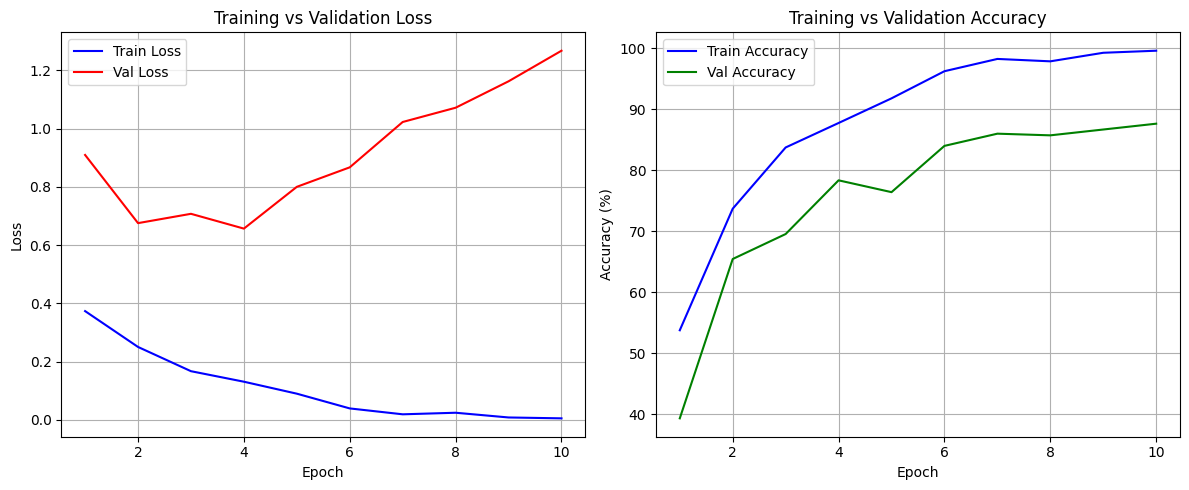

In [47]:
import matplotlib.pyplot as plt

# =====================
# Plot Loss & Accuracy Curves
# =====================
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(12,5))

# ----- Loss Curve -----
plt.subplot(1,2,1)
plt.plot(epochs, train_losses, 'b-', label='Train Loss')
plt.plot(epochs, val_losses, 'r-', label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)

# ----- Accuracy Curve -----
plt.subplot(1,2,2)
plt.plot(epochs, train_accuracies, 'b-', label='Train Accuracy')
plt.plot(epochs, val_accuracies, 'g-', label='Val Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

📈 Val Loss: 1.2677
✅ Val Acc: 87.60%

🧾 Classification Report:
              precision    recall  f1-score   support

 manipulated      0.937     0.921     0.929      9647
        real      0.495     0.555     0.523      1350

    accuracy                          0.876     10997
   macro avg      0.716     0.738     0.726     10997
weighted avg      0.882     0.876     0.879     10997



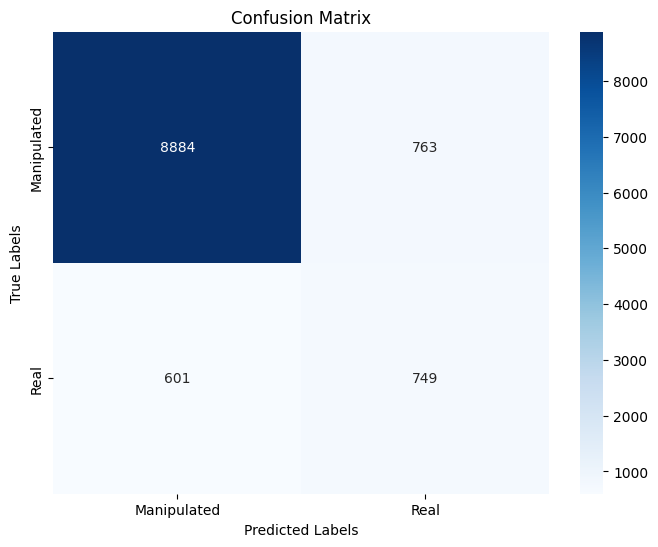

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Print Validation Loss and Accuracy
print(f"📈 Val Loss: {avg_val_loss:.4f}")
print(f"✅ Val Acc: {val_acc:.2f}%")

# Classification Report
print("\n🧾 Classification Report:")
print(classification_report(
    [idx_to_class[i] for i in true_labels],
    [idx_to_class[i] for i in pred_labels],
    digits=3
))

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Manipulated', 'Real'], yticklabels=['Manipulated', 'Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

📈 Val Loss: 1.2677
✅ Val Acc: 87.60%

🧾 Classification Report:
              precision    recall  f1-score   support

 manipulated      0.937     0.921     0.929      9647
        real      0.495     0.555     0.523      1350

    accuracy                          0.876     10997
   macro avg      0.716     0.738     0.726     10997
weighted avg      0.882     0.876     0.879     10997



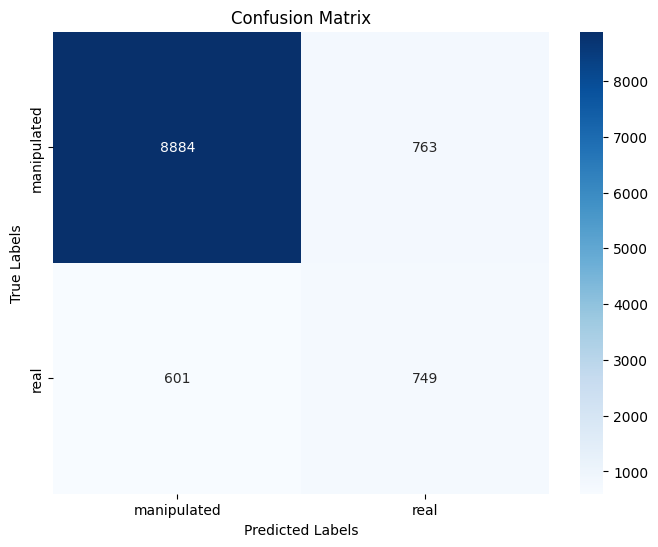

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Print Validation Loss and Accuracy
print(f"📈 Val Loss: {avg_val_loss:.4f}")
print(f"✅ Val Acc: {val_acc:.2f}%")

# Classification Report
print("\n🧾 Classification Report:")
print(classification_report(
    [idx_to_class[i] for i in true_labels],
    [idx_to_class[i] for i in pred_labels],
    digits=3
))

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Normalize (optional, for percentages)
cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

# Labels from idx_to_class
labels = [idx_to_class[i] for i in sorted(idx_to_class.keys())]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()